# Import Dataset

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import math
# Visualization Library
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/taufikyasirs/marketing_campaign_marketektive/master/marketing_campaign.csv',delimiter=';')

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

1. Dataset terdiri dari 29 columns dan 2240 rows data
2. Variasi tipe data yang ada pada dataset adalah int64, object, float64
Pada kolom Income memiliki 2216 rows nilai non-null dari keseluruhan 2240 rows yang berarti terdapat 24 nilai null / missing values sedangkan untuk kolom lainya jumlah rows non-null sama dengan keseluruhan rows data yang ada
3. Type data keseluruhan sudah tidak mengalami masalah hanya sebaiknya pada data Dt_customer yang isinya berkaitan dengan waktu dan tanggal ada baiknya dijadikan ke tipe Datetime saja



## Missing Value

### Null Value

In [ ]:
# Menghitung jumlah baris sebelum dropna
total_rows_before = len(df)

# Menghitung jumlah nilai null dalam setiap kolom
null_counts = df.isnull().sum()

# Menampilkan presentase nilai null dalam setiap kolom
print("Presentase nilai null sebelum dropna:")
print((null_counts / total_rows_before) * 100)

# Menghapus baris yang mengandung nilai null
df_clean = df.dropna()

# Menghitung jumlah baris setelah dropna
total_rows_after = len(df_clean)

# Menghitung presentase nilai null dalam setiap kolom setelah dropna
null_counts_after = df_clean.isnull().sum()
print("\nPresentase nilai null setelah dropna:")
print((null_counts_after / total_rows_after) * 100)

# Menampilkan informasi jumlah baris sebelum dan setelah dropna
print("\nJumlah baris sebelum dropna:", total_rows_before)
print("Jumlah baris setelah dropna:", total_rows_after)


Presentase nilai null sebelum dropna:
ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Presentase nilai n

Summary

1. Pada column Income terdapat 24 nilai Null atau sekitar 1%, karena nilainya < 10% maka dilakukan handling nilai Null
2. Setelah dilakukan handling Null jumlah data sekarang berjumlah 2216

### Merging Column Same Value

In [ ]:
df_clean = df_clean.copy()
df_clean['Marital_Status'].replace(['Alone', 'YOLO', 'Absurd'], 'Single', inplace=True)
df_clean['Education'].replace('2n Cycle', 'Master', inplace=True)

Summary
1. Pada column Marital_Status terdapat value Alone, YOLO, dan Absurd yang diasusmsikan sama dengan Single maka untuk value tersebut di lakukan perubahan menjadi Single.
2. Pada column Education terdapat 2n Cycle dan Master yang sebenarnya setara maka untuk value 2n Cycle di lakukan perubahan menjadi Master.

## Data Duplicate

In [ ]:
df_clean.duplicated('ID').sum()

0

Summary
1. Pengecekan duplicate dilakukan berdasarkan ID untuk mengetahui apakah data ganda berdasarkan ID customer, setelah dilakukan pengecekan didapatkan hasil bahwa tidak ada duplicate sehingga tidak dilakukan handling duplicate.

## Handling Outlier

In [ ]:
# Pilih kolom-kolom numerik kecuali kolom respons dan objek
numerical_columns = df_clean.select_dtypes(exclude=['object']).columns
features = numerical_columns[numerical_columns != 'Response']


for f in features:
    Q1 = df_clean[f].quantile(0.25)
    Q3 = df_clean[f].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (1.5 * IQR)
    high_limit = Q3 + (1.5 * IQR)
    filtered_entries = ((df_clean[f] >= low_limit) & (df_clean[f] <= high_limit))
    df_cleaned = df_clean[filtered_entries]

print("Jumlah baris setelah menghapus outlier:", df_cleaned.shape[0])
print("Jumlah kolom setelah menghapus outlier:", df_cleaned.shape[1])

Jumlah baris setelah menghapus outlier: 2216
Jumlah kolom setelah menghapus outlier: 29


Summary
1. Handling outlier dilakukan untuk data numeric, kecuali pada response dikarenakan response merupakan target pada dataset ini
2. Handling outlier dilakukan dengan menggunakan limit IQR.
3. Setelah dilakukan handling outlier, baris data yang dimiliki sekarang berjumlah 2216.

## Features Engineering

In [ ]:
df_cleaned.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df_cleaned  = df_cleaned.copy()
# Modify Data Type Date
df_cleaned['Dt_Customer'] = pd.to_datetime(df_cleaned['Dt_Customer'])

# Add Year Column
df_cleaned['Membership_Age'] = 2014 - df_cleaned['Dt_Customer'].dt.year

# Create Age Column
df_cleaned['Customer_Age'] = 2014 - df_cleaned['Year_Birth']

# Create Total Campaign Column
df_cleaned['Ratio_Acceptance'] = (((df_cleaned['AcceptedCmp1'] + df_cleaned['AcceptedCmp2'] + df_cleaned['AcceptedCmp3'] + df_cleaned['AcceptedCmp4'] + df_cleaned['AcceptedCmp5']) / 5) * 100)

# Create Total Purchase Column
df_cleaned['Frequency_Online_Purchase'] = df_cleaned['NumCatalogPurchases'] + df_cleaned['NumWebPurchases']
df_cleaned['Frequency_Offline_Purchase'] = df_cleaned['NumStorePurchases']
df_cleaned['Frequency_Promo_Purchase'] = df_cleaned['NumDealsPurchases']

# Create Total Expense Column
df_cleaned['Consumable_Expenses'] = df_cleaned['MntWines'] + df_cleaned['MntFishProducts'] + df_cleaned['MntMeatProducts'] + df_cleaned['MntFruits'] + df_cleaned['MntSweetProducts']
df_cleaned['Non_Consumable_Expenses'] = df_cleaned['MntGoldProds']

# Mengambil hanya kolom produk
produk_columns = df_cleaned.columns[df_cleaned.columns.str.startswith('Mnt')]
df_cleaned['Favorite_Product'] = df_cleaned[produk_columns].idxmax(axis=1)
df_cleaned['2nd_Favorite_Product'] = df_cleaned[produk_columns].apply(lambda row: row.nlargest(2).index[1], axis=1)

df_cleaned.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Membership_Age,Customer_Age,Ratio_Acceptance,Frequency_Online_Purchase,Frequency_Offline_Purchase,Frequency_Promo_Purchase,Consumable_Expenses,Non_Consumable_Expenses,Favorite_Product,2nd_Favorite_Product
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,2,57,0.0,18,4,3,1529,88,MntWines,MntMeatProducts
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,60,0.0,2,2,2,21,6,MntWines,MntMeatProducts
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,1,49,0.0,10,10,1,734,42,MntWines,MntMeatProducts
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,30,0.0,2,4,2,48,5,MntMeatProducts,MntWines
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,33,0.0,8,6,5,407,15,MntWines,MntMeatProducts


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Education                   2216 non-null   object 
 1   Marital_Status              2216 non-null   object 
 2   Income                      2216 non-null   float64
 3   Kidhome                     2216 non-null   int64  
 4   Teenhome                    2216 non-null   int64  
 5   Recency                     2216 non-null   int64  
 6   NumWebVisitsMonth           2216 non-null   int64  
 7   Complain                    2216 non-null   int64  
 8   Z_CostContact               2216 non-null   int64  
 9   Z_Revenue                   2216 non-null   int64  
 10  Response                    2216 non-null   int64  
 11  Membership_Age              2216 non-null   int64  
 12  Customer_Age                2216 non-null   int64  
 13  Ratio_Acceptance            2216 

In [ ]:
df_cleaned = df_cleaned.drop(['ID', 'Dt_Customer', 'Year_Birth',
                              'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                              'NumCatalogPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumDealsPurchases',
                              'MntWines', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntGoldProds'], axis=1)

In [ ]:
round(df_cleaned.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.25,25173.08,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2216.0,0.44,0.54,0.0,0.0,0.0,1.0,2.0
Teenhome,2216.0,0.51,0.54,0.0,0.0,0.0,1.0,2.0
Recency,2216.0,49.01,28.95,0.0,24.0,49.0,74.0,99.0
NumWebVisitsMonth,2216.0,5.32,2.43,0.0,3.0,6.0,7.0,20.0
Complain,2216.0,0.01,0.10,0.0,0.0,0.0,0.0,1.0
Z_CostContact,2216.0,3.00,0.00,3.0,3.0,3.0,3.0,3.0
Z_Revenue,2216.0,11.00,0.00,11.0,11.0,11.0,11.0,11.0
Response,2216.0,0.15,0.36,0.0,0.0,0.0,0.0,1.0
Membership_Age,2216.0,0.97,0.69,0.0,1.0,1.0,1.0,2.0


In [ ]:
cats = df_cleaned.select_dtypes(include= 'object').columns.to_list()

round(df_cleaned[cats].describe(),2).T

,count,unique,top,freq
Education,2216,4,Graduation,1116
Marital_Status,2216,5,Married,857
Favorite_Product,2216,6,MntWines,1522
2nd_Favorite_Product,2216,6,MntMeatProducts,1324


Summary

Features Extraction:
1. Customer_Age
2. Membership_Age
3. Ratio Acceptense
4. Frequency_Online_Purchase
5. Frequency_Offline_Purchase
6. Frequency_Promo_Purchase
7. Consumable_Expenses
8. Non_Consumable_Expenses

Features Selection:

1. Features Z_CostContact dan Z_Revenue tidak dijadikan sebagai features nantinya melainkan dijadikan acuan penghitungan karena std = 0
2. Features numeric yang perlu dieliminasi ID, Dt_Customer, Year_Birth, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, NumCatalogPurchases, NumWebPurchases, NumStorePurchases, NumDealsPurchases, MntWines, MntFishProducts, MntMeatProducts, MntFruits,MntSweetProducts, dan MntGoldProds.


## Features Encoding

In [ ]:
df_cleaned.sample(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,...,Membership_Age,Customer_Age,Ratio_Acceptance,Frequency_Online_Purchase,Frequency_Offline_Purchase,Frequency_Promo_Purchase,Consumable_Expenses,Non_Consumable_Expenses,Favorite_Product,2nd_Favorite_Product
1408,Graduation,Married,57045.0,0,1,40,3,0,3,11,...,2,64,0.0,6,9,3,437,17,MntWines,MntMeatProducts
2071,Graduation,Married,71866.0,0,1,85,3,0,3,11,...,1,58,0.0,9,10,1,682,33,MntWines,MntFruits
32,Graduation,Together,40548.0,0,1,31,5,0,3,11,...,2,44,20.0,3,4,2,117,3,MntWines,MntMeatProducts
1644,Master,Together,75774.0,1,0,27,4,0,3,11,...,0,33,0.0,12,8,1,767,56,MntWines,MntFishProducts
1663,Graduation,Single,43602.0,1,1,45,6,0,3,11,...,0,48,0.0,4,2,3,49,19,MntWines,MntGoldProds


In [ ]:
from scipy.stats import chi2_contingency

def cat_vs_resp(column):
    resp_by = df_cleaned.groupby(column)['Response'].value_counts(normalize=True).to_frame()
    resp_by.columns = ['Proportion']
    resp_by_pvt = resp_by.reset_index().pivot(columns='Response', index=column, values='Proportion')
    display(resp_by_pvt * 100)

    contingency = df_cleaned.groupby([column, 'Response']).agg({'Response': 'count'}).rename(columns={'Response': 'count'}).reset_index().pivot(index=column, columns='Response', values='count')
    stats, p, dof, expected = chi2_contingency(contingency)
    if p < 0.5:
        print(f'Column {column} has a strong relationship with the Response Label.')
    else:
        print(f'Column {column} has a weak relationship with the Response Label.')

    resp_by_pvt.plot(kind='bar', stacked=True, ylabel='Proportion')
    plt.title(f'Response Proportion by {column}')
    plt.show()


In [ ]:
df_cleaned.select_dtypes(include='object').columns

Index(['Education', 'Marital_Status', 'Favorite_Product',
       '2nd_Favorite_Product'],
      dtype='object')

Response,0,1
Education,,
Basic,96.296296,3.703704
Graduation,86.379928,13.620072
Master,86.194690,13.805310
PhD,79.002079,20.997921


Column Education has a strong relationship with the Response Label.


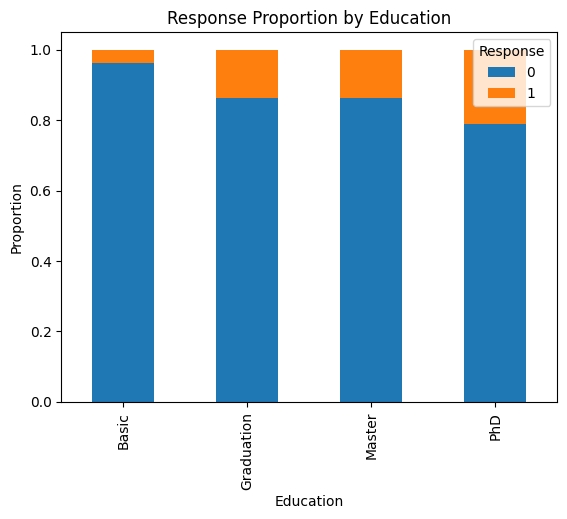

Response,0,1
Marital_Status,,
Divorced,79.310345,20.689655
Married,88.564761,11.435239
Single,77.196653,22.803347
Together,89.528796,10.471204
Widow,76.315789,23.684211


Column Marital_Status has a strong relationship with the Response Label.


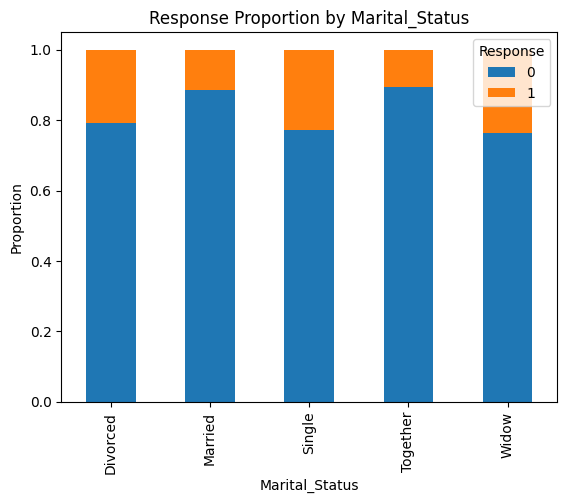

Response,0,1
Favorite_Product,,
MntFishProducts,98.305085,1.694915
MntFruits,93.333333,6.666667
MntGoldProds,81.437126,18.562874
MntMeatProducts,82.151030,17.848970
MntSweetProducts,75.000000,25.000000
MntWines,85.676741,14.323259


Column Favorite_Product has a strong relationship with the Response Label.


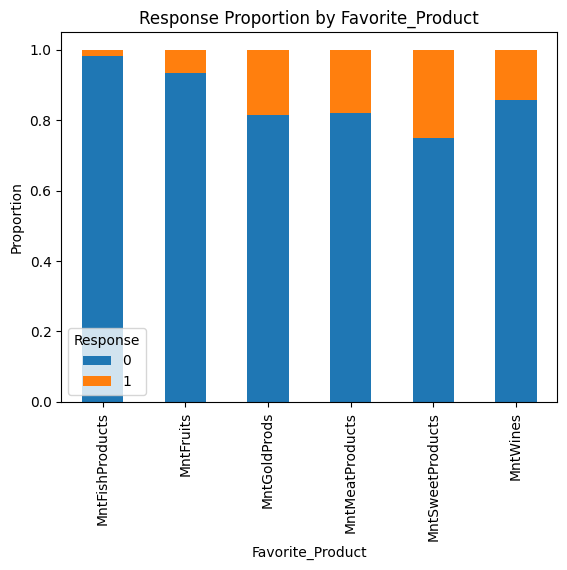

Response,0,1
2nd_Favorite_Product,,
MntFishProducts,89.622642,10.377358
MntFruits,90.697674,9.302326
MntGoldProds,88.141026,11.858974
MntMeatProducts,84.818731,15.181269
MntSweetProducts,84.782609,15.217391
MntWines,81.038961,18.961039


Column 2nd_Favorite_Product has a strong relationship with the Response Label.


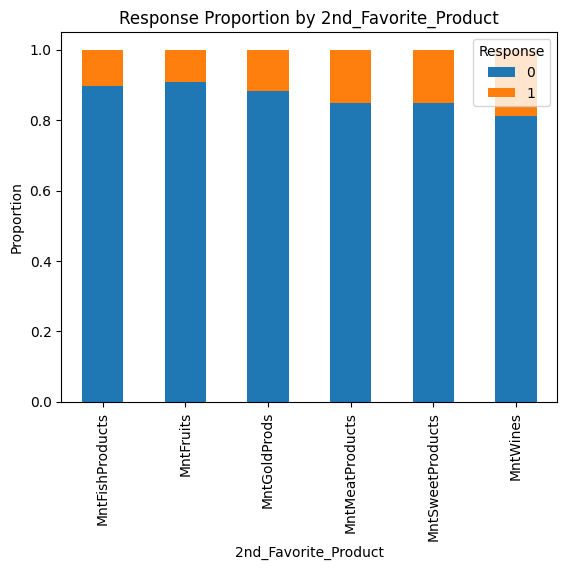

In [ ]:
for col in df_cleaned.select_dtypes(include='object').columns:
    cat_vs_resp(col)

### One Hot Encoding

In [ ]:
df_edu = pd.get_dummies(df_cleaned['Education'], prefix='Edu')

df_cleaned = pd.concat([df_cleaned, df_edu], axis=1)

# Drop the original 'Education' column if needed
df_cleaned = df_cleaned.drop('Education', axis=1)

df_cleaned.head()

,Marital_Status,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,...,Frequency_Offline_Purchase,Frequency_Promo_Purchase,Consumable_Expenses,Non_Consumable_Expenses,Favorite_Product,2nd_Favorite_Product,Edu_Basic,Edu_Graduation,Edu_Master,Edu_PhD
0,Single,58138.0,0,0,58,7,0,3,11,1,...,4,3,1529,88,MntWines,MntMeatProducts,0,1,0,0
1,Single,46344.0,1,1,38,5,0,3,11,0,...,2,2,21,6,MntWines,MntMeatProducts,0,1,0,0
2,Together,71613.0,0,0,26,4,0,3,11,0,...,10,1,734,42,MntWines,MntMeatProducts,0,1,0,0
3,Together,26646.0,1,0,26,6,0,3,11,0,...,4,2,48,5,MntMeatProducts,MntWines,0,1,0,0
4,Married,58293.0,1,0,94,5,0,3,11,0,...,6,5,407,15,MntWines,MntMeatProducts,0,0,0,1


In [ ]:
df_MS = pd.get_dummies(df_cleaned['Marital_Status'], prefix='MS')

df_cleaned = pd.concat([df_cleaned, df_MS], axis=1)

# Drop the original 'Education' column if needed
df_cleaned = df_cleaned.drop('Marital_Status', axis=1)

df_cleaned.head()

,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Membership_Age,...,2nd_Favorite_Product,Edu_Basic,Edu_Graduation,Edu_Master,Edu_PhD,MS_Divorced,MS_Married,MS_Single,MS_Together,MS_Widow
0,58138.0,0,0,58,7,0,3,11,1,2,...,MntMeatProducts,0,1,0,0,0,0,1,0,0
1,46344.0,1,1,38,5,0,3,11,0,0,...,MntMeatProducts,0,1,0,0,0,0,1,0,0
2,71613.0,0,0,26,4,0,3,11,0,1,...,MntMeatProducts,0,1,0,0,0,0,0,1,0
3,26646.0,1,0,26,6,0,3,11,0,0,...,MntWines,0,1,0,0,0,0,0,1,0
4,58293.0,1,0,94,5,0,3,11,0,0,...,MntMeatProducts,0,0,0,1,0,1,0,0,0


In [ ]:
df_FP = pd.get_dummies(df_cleaned['Favorite_Product'], prefix='Fav_Prod')

df_cleaned = pd.concat([df_cleaned, df_FP], axis=1)

# Drop the original 'Education' column if needed
df_cleaned = df_cleaned.drop('Favorite_Product', axis=1)

df_cleaned.head()

,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Membership_Age,...,MS_Married,MS_Single,MS_Together,MS_Widow,Fav_Prod_MntFishProducts,Fav_Prod_MntFruits,Fav_Prod_MntGoldProds,Fav_Prod_MntMeatProducts,Fav_Prod_MntSweetProducts,Fav_Prod_MntWines
0,58138.0,0,0,58,7,0,3,11,1,2,...,0,1,0,0,0,0,0,0,0,1
1,46344.0,1,1,38,5,0,3,11,0,0,...,0,1,0,0,0,0,0,0,0,1
2,71613.0,0,0,26,4,0,3,11,0,1,...,0,0,1,0,0,0,0,0,0,1
3,26646.0,1,0,26,6,0,3,11,0,0,...,0,0,1,0,0,0,0,1,0,0
4,58293.0,1,0,94,5,0,3,11,0,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
df_ndFP = pd.get_dummies(df_cleaned['2nd_Favorite_Product'], prefix='ndFav_Prod')

df_cleaned = pd.concat([df_cleaned, df_ndFP], axis=1)

# Drop the original 'Education' column if needed
df_cleaned = df_cleaned.drop('2nd_Favorite_Product', axis=1)

df_cleaned.head()

,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Membership_Age,...,Fav_Prod_MntGoldProds,Fav_Prod_MntMeatProducts,Fav_Prod_MntSweetProducts,Fav_Prod_MntWines,ndFav_Prod_MntFishProducts,ndFav_Prod_MntFruits,ndFav_Prod_MntGoldProds,ndFav_Prod_MntMeatProducts,ndFav_Prod_MntSweetProducts,ndFav_Prod_MntWines
0,58138.0,0,0,58,7,0,3,11,1,2,...,0,0,0,1,0,0,0,1,0,0
1,46344.0,1,1,38,5,0,3,11,0,0,...,0,0,0,1,0,0,0,1,0,0
2,71613.0,0,0,26,4,0,3,11,0,1,...,0,0,0,1,0,0,0,1,0,0
3,26646.0,1,0,26,6,0,3,11,0,0,...,0,1,0,0,0,0,0,0,0,1
4,58293.0,1,0,94,5,0,3,11,0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Income                       2216 non-null   float64
 1   Kidhome                      2216 non-null   int64  
 2   Teenhome                     2216 non-null   int64  
 3   Recency                      2216 non-null   int64  
 4   NumWebVisitsMonth            2216 non-null   int64  
 5   Complain                     2216 non-null   int64  
 6   Z_CostContact                2216 non-null   int64  
 7   Z_Revenue                    2216 non-null   int64  
 8   Response                     2216 non-null   int64  
 9   Membership_Age               2216 non-null   int64  
 10  Customer_Age                 2216 non-null   int64  
 11  Ratio_Acceptance             2216 non-null   float64
 12  Frequency_Online_Purchase    2216 non-null   int64  
 13  Frequency_Offline_

Summary

1. Column kategori (Marital_Status, Education, Favorite_Product, 2nd_Favorite_Product) dilakukan pengecekan korelasi terhadap target(Response) untuk mengetahui apakah kategori tersebut perlu dilakukan features encoding atau tidak.
2. Algoritma pengecekan korelasi yang digunakan adalah chi2_contingency, berdasarkan hasil pengecekan ternyata data kategori memiliki korelasi yang kuat terhadap target (Response) sehingga perlu dilakukan features Encoding.
3.  Features encoding dilakukan supaya permodelan mechine learning nantinya dapat belajar data yang lebih banyak, features encoding yang dilakukan menggunakan metode One Hot Encoding.

## Normalizing the Distribution

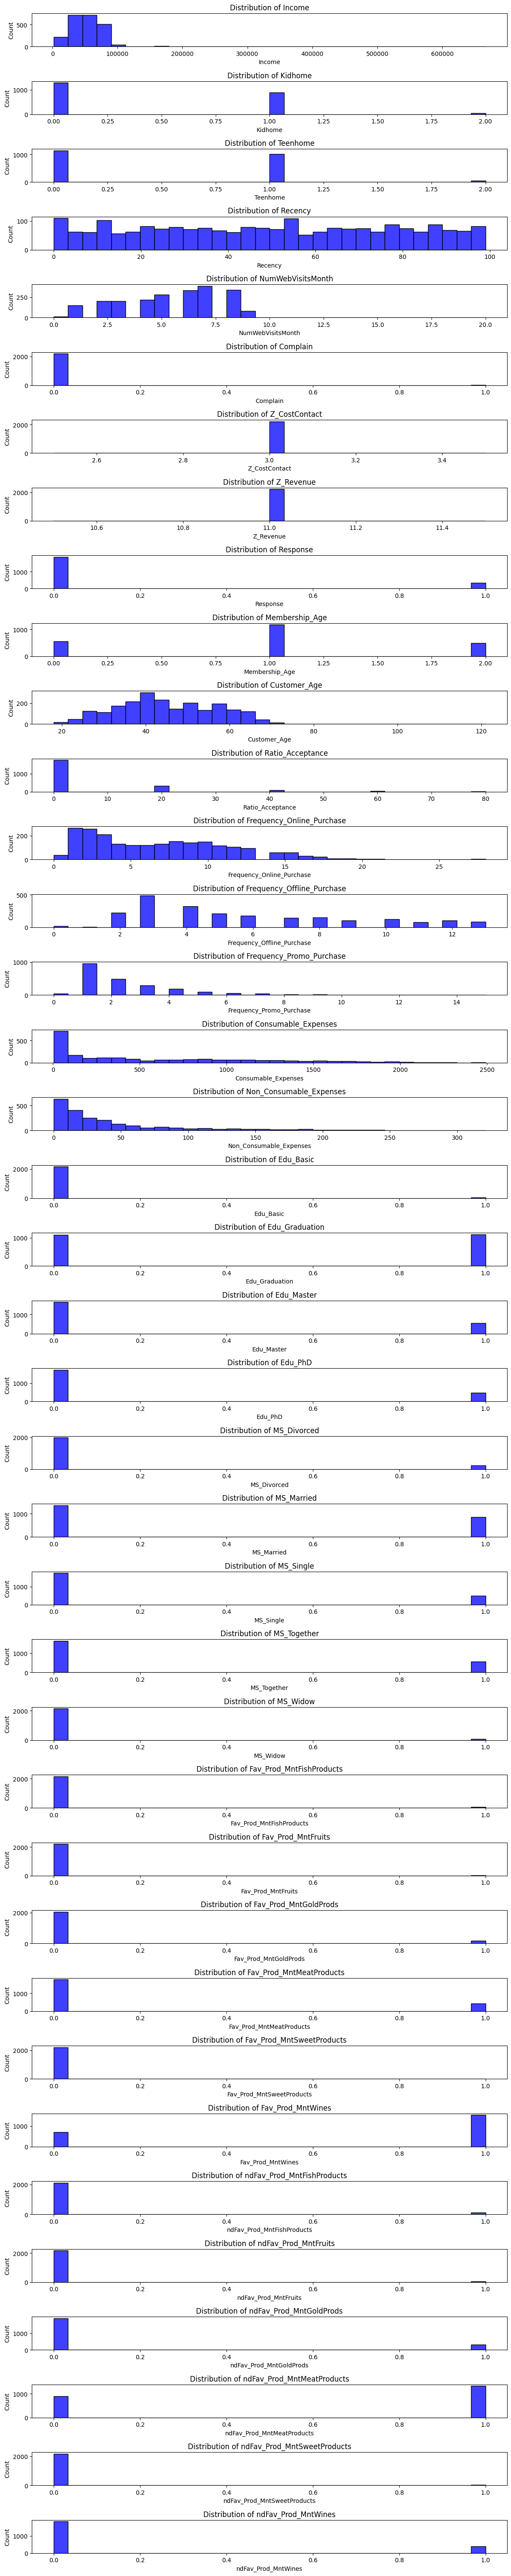

In [ ]:
# Normalisating Distribution
plt.figure(figsize=(12, 60))

for i, column in enumerate(df_cleaned.columns):
    plt.subplot(len(df_cleaned.columns), 1, i+1)
    sns.histplot(data=df_cleaned, x=column, color='blue', bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [ ]:
# Kolom yang akan di-log-transform
log_columns = ['Income', 'Customer_Age',
               'Frequency_Online_Purchase', 'Frequency_Offline_Purchase', 'Frequency_Promo_Purchase',
               'Consumable_Expenses', 'Non_Consumable_Expenses']

# Lakukan log-transform pada kolom tertentu
epsilon = 1e-8
df_cleaned[log_columns] = np.log(df_cleaned[log_columns] + epsilon)


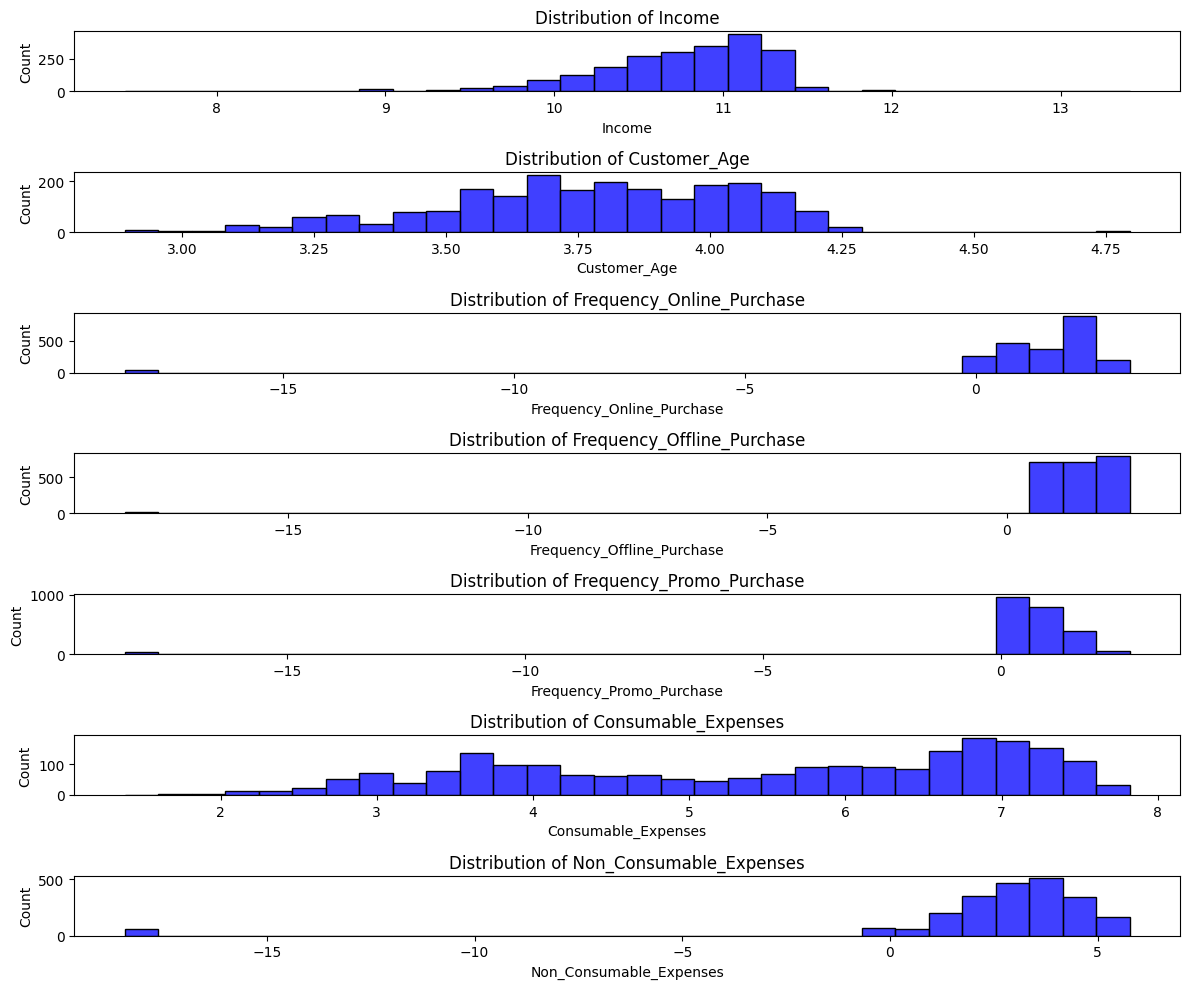

In [ ]:
# Normalisating Distribution
plt.figure(figsize=(12, 10))

for i, column in enumerate(log_columns):
    plt.subplot(len(log_columns), 1, i+1)
    sns.histplot(data=df_cleaned, x=column, color='blue', bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Summary

1. Pada data numeric terdapat beberapa kolom yang belum terdistribusi normal atau skewed positive sehingga perlu didistribusi normal menggunakan log transformation.
2. Data numeric yang skewed positive adalah Income, Customer_Age, Frequency_Online_Purchase, Frequency_Offline_Purchase, Frequency_Promo_Purchase, Consumable_Expenses, dan Non_Consumable_Expenses.
3. Setelah dilakukan log transformation data tersebut terlihat lebih terdistribusi normal daripada sebelumnya.

## Standardization

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Income                       2216 non-null   float64
 1   Kidhome                      2216 non-null   int64  
 2   Teenhome                     2216 non-null   int64  
 3   Recency                      2216 non-null   int64  
 4   NumWebVisitsMonth            2216 non-null   int64  
 5   Complain                     2216 non-null   int64  
 6   Z_CostContact                2216 non-null   int64  
 7   Z_Revenue                    2216 non-null   int64  
 8   Response                     2216 non-null   int64  
 9   Membership_Age               2216 non-null   int64  
 10  Customer_Age                 2216 non-null   float64
 11  Ratio_Acceptance             2216 non-null   float64
 12  Frequency_Online_Purchase    2216 non-null   float64
 13  Frequency_Offline_

In [ ]:
df_cleanedd = df_cleaned.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming df_cleanedd is your feature dataframe

# Identify numerical features excluding the 'Response' column
numerical_features = df_cleanedd.select_dtypes(include=['float64', 'int64', 'uint8']).columns.tolist()
numerical_features = [feature for feature in numerical_features if feature != 'Response']

# Extract the 'Response' column separately
response_column = df_cleanedd['Response']

for n in numerical_features:
    try:
        # Use StandardScaler directly on the DataFrame
        scaler = StandardScaler()
        df_cleanedd[n] = scaler.fit_transform(df_cleanedd[[n]].copy())
    except ValueError:
        pass  # Skip printing error message

# Put the 'Response' column back into the DataFrame
df_cleanedd['Response'] = response_column

In [ ]:
df_cleanedd.describe()

,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Membership_Age,...,Fav_Prod_MntGoldProds,Fav_Prod_MntMeatProducts,Fav_Prod_MntSweetProducts,Fav_Prod_MntWines,ndFav_Prod_MntFishProducts,ndFav_Prod_MntFruits,ndFav_Prod_MntGoldProds,ndFav_Prod_MntMeatProducts,ndFav_Prod_MntSweetProducts,ndFav_Prod_MntWines
count,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2216.0,2216.0,2216.000000,2.216000e+03,...,2.216000e+03,2.216000e+03,2.216000e+03,2216.000000,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03
mean,-2.388783e-15,-1.122247e-16,4.168346e-17,-2.404815e-18,-5.771557e-17,1.523050e-17,0.0,0.0,0.150271,-9.298619e-17,...,-4.128266e-17,-2.565136e-17,3.046099e-17,0.000000,2.084173e-17,-2.244494e-17,-4.809630e-17,-1.490985e-16,8.016051e-19,4.569149e-17
std,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,0.0,0.0,0.357417,1.000226e+00,...,1.000226e+00,1.000226e+00,1.000226e+00,1.000226,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00
min,-6.520871e+00,-8.230393e-01,-9.289722e-01,-1.693488e+00,-2.193591e+00,-9.781206e-02,0.0,0.0,0.000000,-1.417393e+00,...,-2.854876e-01,-4.956245e-01,-8.528029e-02,-1.480906,-2.241360e-01,-1.406709e-01,-4.048031e-01,-1.218321e+00,-1.455959e-01,-4.585495e-01
25%,-5.577404e-01,-8.230393e-01,-9.289722e-01,-8.642385e-01,-9.563810e-01,-9.781206e-02,0.0,0.0,0.000000,4.147503e-02,...,-2.854876e-01,-4.956245e-01,-8.528029e-02,-1.480906,-2.241360e-01,-1.406709e-01,-4.048031e-01,-1.218321e+00,-1.455959e-01,-4.585495e-01
50%,1.843487e-01,-8.230393e-01,-9.289722e-01,-4.365786e-04,2.808287e-01,-9.781206e-02,0.0,0.0,0.000000,4.147503e-02,...,-2.854876e-01,-4.956245e-01,-8.528029e-02,0.675262,-2.241360e-01,-1.406709e-01,-4.048031e-01,8.208021e-01,-1.455959e-01,-4.585495e-01
75%,7.535568e-01,1.039938e+00,9.090657e-01,8.633654e-01,6.932320e-01,-9.781206e-02,0.0,0.0,0.000000,4.147503e-02,...,-2.854876e-01,-4.956245e-01,-8.528029e-02,0.675262,-2.241360e-01,-1.406709e-01,-4.048031e-01,8.208021e-01,-1.455959e-01,-4.585495e-01
max,5.252104e+00,2.902916e+00,2.747104e+00,1.727167e+00,6.054474e+00,1.022369e+01,0.0,0.0,1.000000,1.500343e+00,...,3.502779e+00,2.017657e+00,1.172604e+01,0.675262,4.461576e+00,7.108789e+00,2.470337e+00,8.208021e-01,6.868327e+00,2.180790e+00


## Spliting

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df_cleanedd is your dataframe
X = df_cleanedd.drop(['Response', 'Z_CostContact', 'Z_Revenue'], axis=1)
y = df_cleanedd['Response']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Class Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution of the 'Response' classes before and after SMOTE
print("Distribution of 'Response' classes before SMOTE:")
print(y_train.value_counts())

print("\nDistribution of 'Response' classes after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Distribution of 'Response' classes before SMOTE:
0    1314
1     237
Name: Response, dtype: int64

Distribution of 'Response' classes after SMOTE:
0    1314
1    1314
Name: Response, dtype: int64
